# Dev and Test notebook

## Imports

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path
import skimage.external.tifffile as tiff

from common import Statistics, dataset_source
from resources.conv_learner import *
from resources.plots import *
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
PATH = "datasets/yeast_v10/"
data_path = Path(PATH)

In [4]:
CLASSES = ('WT', 'mfb1KO', 'mmr1KO','mmm1KO', 'num1KO','mfb1KO_mmr1KO')
NUM_CLASSES = len(CLASSES)
BATCH_SIZE = 64
SIZE = 200

In [5]:
# stats_name = "yeast_v5.3_per_class.dict"
classes = Statistics.source_class(data_path)

train_val = zip(classes['train'], classes['val'])
# Xtest = zip(classes['test'])
 
main_stats = Statistics.per_class(train_val, inspect = False)
# test_stats = Statistics.per_class(Xtest, save_name=stats_name)

working on: datasets\yeast_v10\train\01_mfb1KO
working on: datasets\yeast_v10\val\01_mfb1KO
working on: datasets\yeast_v10\train\01_mmm1KO
working on: datasets\yeast_v10\val\01_mmm1KO
working on: datasets\yeast_v10\train\01_mmr1KO
working on: datasets\yeast_v10\val\01_mmr1KO
working on: datasets\yeast_v10\train\01_num1KO
working on: datasets\yeast_v10\val\01_num1KO
working on: datasets\yeast_v10\train\01_WT
working on: datasets\yeast_v10\val\01_WT
working on: datasets\yeast_v10\train\02_mfb1KO
working on: datasets\yeast_v10\val\02_mfb1KO
working on: datasets\yeast_v10\train\02_mmr1KO
working on: datasets\yeast_v10\val\02_mmr1KO
working on: datasets\yeast_v10\train\02_mmr1KO-mfb1KO
working on: datasets\yeast_v10\val\02_mmr1KO-mfb1KO
working on: datasets\yeast_v10\train\02_WT
working on: datasets\yeast_v10\val\02_WT
working on: datasets\yeast_v10\train\03_dnm1KO
working on: datasets\yeast_v10\val\03_dnm1KO
working on: datasets\yeast_v10\train\03_fzo1KO
working on: datasets\yeast_v10\val\

In [6]:
for keys in main_stats.keys():
    print(f"{keys}: \t \t \t {main_stats[keys]}")

01_mfb1KO: 	 	 	 (array([0.02111, 0.00453]), array([0.00149, 0.00161]))
01_mmm1KO: 	 	 	 (array([0.02102, 0.00424]), array([0.00149, 0.00183]))
01_mmr1KO: 	 	 	 (array([0.02115, 0.00486]), array([0.00157, 0.00194]))
01_num1KO: 	 	 	 (array([0.02098, 0.005  ]), array([0.00153, 0.00209]))
01_WT: 	 	 	 (array([0.0211, 0.0045]), array([0.00149, 0.00129]))
02_mfb1KO: 	 	 	 (array([0.00794, 0.00484]), array([0.00075, 0.00163]))
02_mmr1KO: 	 	 	 (array([0.00799, 0.00503]), array([0.0008 , 0.00186]))
02_mmr1KO-mfb1KO: 	 	 	 (array([0.00791, 0.00489]), array([0.00073, 0.00162]))
02_WT: 	 	 	 (array([0.00796, 0.00478]), array([0.00075, 0.00149]))
03_dnm1KO: 	 	 	 (array([0.02515, 0.00477]), array([0.0025 , 0.00192]))
03_fzo1KO: 	 	 	 (array([0.02517, 0.0047 ]), array([0.00202, 0.00202]))
03_H2O2: 	 	 	 (array([0.02574, 0.00364]), array([0.00221, 0.00018]))
03_WT: 	 	 	 (array([0.02536, 0.00459]), array([0.00255, 0.00147]))


In [ ]:
print(main_stats['01_WT'])

# Bug in balancing batch composition:

In [ ]:
wgths = to_np(data.trn_dl.sampler.weights) #__dict__.keys()
ws = dict.fromkeys(list(wgths)).keys()
list(ws)[0] /sum(ws)
print(set(wgths))

In [ ]:
#raw code from dataset.compute_adjusted_weights()

dataset = data.trn_dl.dataset.y


weights = np.zeros(len(dataset))
labels = list(set(dataset))
occurrences = np.bincount(dataset)
probs = [100 * count/sum(occurrences) for count in occurrences]

for idx, label in enumerate(labels):
    weights[dataset == label] = probs[idx] / occurrences[idx]
desired = 100 / len(labels) # desired probability per class


for idx, prob in enumerate(probs):
    delta = desired - prob # unlikely to be 0
    correction = delta / occurrences[idx]
    weights[dataset == labels[idx]] += correction

In [ ]:
print(sorted(set(probs), reverse = True))
print(desired)
# print(weights)
print(occurrences)
print(labels)
print(delta)
print(correction)
print(sorted(set(weights)))

In [ ]:
def analyze_batch_composition():
    
    bat_ = iter(data.trn_dl)

    for i in range(len(data.trn_dl)):
        x, y = next(bat_)
        ys = np.array([list(to_np(y)).count(j) for j in range(NUM_CLASSES)])
        print
        if i == 0:
            bys = ys
        else:
            bys = np.vstack((bys, ys))

    means = np.mean(bys, axis = 0)/64
    print(means)

In [ ]:
analyze_batch_composition()

# Analyzing and visualizing inference results:

In [1]:
# Need to define and warm-up model...

In [ ]:
test_log_preds, targs = learn.predict_with_targs(is_test=True)
testprobs = np.exp(test_log_preds)
preds = np.argmax(testprobs, axis=1)

In [ ]:
_, lbl2idx_, test_lbl2idx_ = ImageClassifierData.prepare_from_path(PATH, val_name='val', bs=64, num_workers=1, test_name='test', test_with_labels=True)

In [ ]:
# make predictions dictionary

h = 0
preds_dict = {}
for i, key in enumerate(test_lbl2idx_.keys()):
    l = h
    h = h + list(data.test_dl.dataset.src_idx).count(i)
    preds_dict[key] = list(preds[l:h])
    print(f"{key} predictions ready ({h - l} elements)")

In [ ]:
preds_rel = {}
for key in preds_dict.keys():
    val = {cls: preds_dict[key].count(i)/len(preds_dict[key]) for i, cls in enumerate(data.classes)}
    preds_rel[key]= val

In [ ]:
def plot_test_preds(targets, preds_rel):
    
    if not isinstance(targets, list):
        targets = [targets]
        
    x = math.ceil((int(len(targets)) /2)) # dynamic scaling of GridSpec
    sz = 4 * x # dynamic scaling of figuresize
    
    # plotting:
    plt.figure(figsize=(12,sz))
    gs1 = plt.GridSpec(x,2)
    gs1.update(wspace = 0.4)

    for i, targ in enumerate(targets):
        to_plot = [preds_rel[targ][key] for key in data.classes] # extracting data
        ax1 = plt.subplot(gs1[i])
        ax1.barh(data.classes, to_plot)
        ax1.set_title(targ)
        ax1.set_xlim(0,1)
    
    plt.show()

In [ ]:
test_classes = list(test_lbl2idx_.keys())

plot_test_preds(test_classes, preds_rel)
# plot_test_preds(['01_WT', '03_WT', '03_fzo1KO', '01_mfb1KO'], preds_rel)

# Plotting means of dataset

In [7]:
def source_classX(root_path: Path):
    folders = {}
    for ds in root_path.iterdir(): # train, test, val
        if any(sub in str(ds) for sub in ['test', 'train', 'val']):
            folders[ds.name] = [dir_ for dir_ in ds.iterdir()]
    return folders

In [ ]:
inspect = True

src_folders = source_classX(data_path)
zipped = zip(src_folders['train'], src_folders['val'])

norm_value=65536
stats = {}

for t in zipped:
    class_images = []
    class_stats = []
    
    for class_dir in t: # t is a tuple
        class_name = class_dir.name
        
        # read from each dir and append to the images
        for file in class_dir.iterdir():
            image = tiff.imread(str(file))
            class_images.append(image)

        # print(f"working on: {class_name}")
#         print(f"working on: {class_dir}")
        print(len(class_images))

        if inspect is False:
            mean = np.mean(class_images, axis=(0, 2, 3)) / norm_value
            stdev = np.std(class_images, axis=(0, 2, 3)) / norm_value
        else:
            mean = np.mean(class_images, axis=(2, 3)) #/ norm_value
            stdev = np.std(class_images, axis=(2, 3)) #/ norm_value 

        stats[class_name] = (mean, stdev)

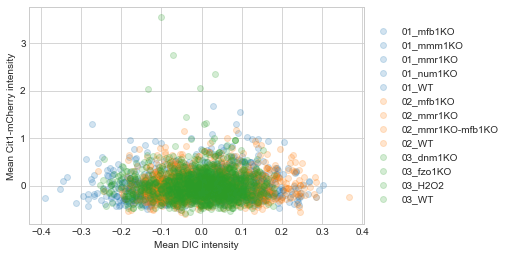

In [54]:
# d = [key.split('_')[0] for key in stats.keys()]
# ds = list(dict.fromkeys(d))
ims_means = {key: stats[key][0] for key in stats.keys()}
ims_means_scaled = {key: (((ims_means[key] / norm_value) - main_stats[key][0]) / main_stats[key][1]) for key in ims_means.keys()}

ims_to_plot = ims_means_scaled

plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.subplot(111)

for k in stats.keys():
    if '01' in k:
        ax.plot(ims_to_plot[k][:,0], ims_to_plot[k][:,1], 'o', label=k, color = 'C0', alpha = 0.2)
    elif '02' in k:
        ax.plot(ims_to_plot[k][:,0], ims_to_plot[k][:,1], 'o', label=k, color = 'C1', alpha = 0.2)
    elif '03' in k:
        ax.plot(ims_to_plot[k][:,0], ims_to_plot[k][:,1], 'o', label=k, color = 'C2', alpha = 0.2)
        
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Mean DIC intensity')
plt.ylabel('Mean Cit1-mCherry intensity');
# plt.xlim(0,1750)
# plt.ylim(0,550);
# plt.legend(fancybox=True, frameon=True, loc='lower center', ncol=2);

In [ ]:
ims_means = {key: stats[key][0] for key in stats.keys()}
# ims_means_scaledX = {x: (((ims_means[x] / norm_value) - main_stats[x][0]) / main_stats[x][1]) for x in im_means.keys()}

In [ ]:
dude = ((ims_means['03_dnm1KO'] / norm_value) - main_stats['03_dnm1KO'][0]) / main_stats['03_dnm1KO'][1]

In [ ]:
plt.style.use('seaborn-whitegrid')
d = [key.split('_')[0] for key in stats.keys()]
ds = list(dict.fromkeys(d))

for k in stats.keys():
    if '01' in k:
        plt.plot(stats[k][0][:,0], stats[k][0][:,1], 'o', label=k, color = 'C0', alpha = 0.2)
    else:
        plt.plot(stats[k][0][:,0], stats[k][0][:,1], 'o', label=k, color = 'C1', alpha = 0.2)


    plt.xlabel('Mean Cit-mCherry intensity')
    plt.ylabel('Mean DIC intensity')
    plt.xlim(0,1500)
    plt.ylim(0,500)
    plt.legend(fancybox=True, frameon=True, loc='lower center', ncol=2)

## Allowing normalization according to both dataset (source) and class

In [28]:
def read_dirsX(path, folder):
    '''
    Fetches name of all files in path in long form, and labels associated by extrapolation of directory names. 
    '''
    lbls, fnames, all_lbls = [], [], [] #(!) Need to modify here for z lable
    full_path = os.path.join(path, folder)
    for lbl in sorted(os.listdir(full_path)):
        if lbl not in ('.ipynb_checkpoints', '.DS_Store'):
            all_lbls.append(lbl)
            for fname in os.listdir(os.path.join(full_path, lbl)):
                if fname not in ('.DS_Store'):
                    fnames.append(os.path.join(folder, lbl, fname))
                    lbls.append(lbl)
    return fnames, lbls, all_lbls

In [25]:
path = PATH
folder = 'val'
fnames, lbls, all_lbls = read_dirsX(path, folder)
    
lbls2classes = {l: l.split('_')[1] for l in all_lbls} # (!) dict mapping lbls (folders) to classes (genotype)
u_classes = list(dict.fromkeys(list(lbls2classes.values()))) # (!) get unique classes

d = {}
if d == {}:
    d_cls = {label: idx for idx, label in enumerate(u_classes)}
    d_src = {label_: idx_ for idx_, label_ in enumerate(lbls2classes)}
    
#     for idx, label in enumerate(u_classes):
#         d_cls[label] = idx
#     for idx_, label_ in enumerate(lbls2classes):
#         d_src[label_] = idx_

    # (!) populating d with lbls: class, class_idx   
    for key, value in lbls2classes.items():
        d[key] = [d_src[key], d_cls[value], lbls2classes[key]] 

src_idxs  = [d[lbl][0] for lbl in lbls] # (!) using d to generate class-lables for each image
cls_idxs  = [d[lbl][1] for lbl in lbls] # (!) using d to generate class-lables for each image

src_idx_arr = np.array(src_idxs, dtype=int)
cls_idx_arr = np.array(cls_idxs, dtype=int)

In [26]:
cls_idx_arr.shape

(455,)

In [27]:
print(d)
print(src_idx_arr)
print(cls_idx_arr)

{'01_WT': [0, 0, 'WT'], '01_mfb1KO': [1, 1, 'mfb1KO'], '01_mmm1KO': [2, 2, 'mmm1KO'], '01_mmr1KO': [3, 3, 'mmr1KO'], '01_num1KO': [4, 4, 'num1KO'], '02_WT': [5, 0, 'WT'], '02_mfb1KO': [6, 1, 'mfb1KO'], '02_mmr1KO': [7, 3, 'mmr1KO'], '02_mmr1KO-mfb1KO': [8, 5, 'mmr1KO-mfb1KO'], '03_H2O2': [9, 6, 'H2O2'], '03_WT': [10, 0, 'WT'], '03_dnm1KO': [11, 7, 'dnm1KO'], '03_fzo1KO': [12, 8, 'fzo1KO']}
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  

In [ ]:
lbl2indexX = {}
trnX = folder_sourceX(PATH, 'val', lbl2indexX)

In [29]:
def folder_sourceX(path, folder, d):
    """
    Returns the filenames and labels for a folder within a path
    (!) Modified to accomodate multiple source folders for a single class e.g. WT from Experiment 01 and 02

    Returns:
    -------
    fnames: a list of the filenames within `folder`
    cls_idx_arr: a numpy array of the label indices in `u_classes` (indices per unique classes)
    u_classes: a list of unique classes (e.g. genotypes) present in all_lbls
    src_idx_arr: a numpy array of the label indices in 'all_lbls' (indices per labels in 'folder'), useful for normalization.
    all_lbls: a list of all of the labels in `folder`, where the # of labels is determined by the # of directories within `folder`
    
    """
    fnames, lbls, all_lbls = read_dirsX(path, folder)
    
    lbls2classes = {l: l.split('_')[1] for l in all_lbls} # (!) dict mapping lbls (folders) to classes (genotype)
    u_classes = list(dict.fromkeys(list(lbls2classes.values()))) # (!) get unique classes
    
    if d == {}:
        d_cls = {label: idx for idx, label in enumerate(u_classes)}
        d_src = {label_: idx_ for idx_, label_ in enumerate(all_lbls)}

        # (!) populating d with lbls: class, class_idx   
        for key, value in lbls2classes.items():
            d[key] = [d_src[key], d_cls[value], lbls2classes[key]]

    src_idxs  = [d[lbl][0] for lbl in lbls] # (!) using d to generate class-lables for each image
    cls_idxs  = [d[lbl][1] for lbl in lbls] # (!) using d to generate source-lables (which dataset) for each image

    src_idx_arr = np.array(src_idxs, dtype=int)
    cls_idx_arr = np.array(cls_idxs, dtype=int)
    
    # temp = [idxs.index(i) for i in range(len(all_lbls))]
    # for ii in temp: print(f"{idxs[ii]} maps to {fnames[ii]}")
    
    return fnames, cls_idx_arr, u_classes, src_idx_arr, all_lbls

In [38]:
PATH = "datasets/yeast_v10.1/"
data_path = Path(PATH)

In [42]:
lbl2indexX = {}
trnX = folder_sourceX(PATH, 'test', lbl2indexX)

In [52]:
isinstance(trnX, tuple)

True

## data_inspect with data_loader

In [3]:
dl_ = data.trn_dl
batch_ = iter(dl_)


plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.subplot(111)

for b in range(0,len(dl)):
    x_, y_ = next(batch_)
    
#     x_np = x_.cpu().numpy()
#     y_np = y.cpu().numpy().copy()

    x_np = to_np(x_)
    y_np = to_np(y_)
    
    im_means = np.mean(x_np, axis=(2,3))
    
    ax.plot(im_means[:,0], im_means[:,1], 'o', color = 'C1' , alpha=0.5)